# Plot MatrixProfile Discords - Anomalies

While we provide some default plotting functionality through visualize, it may not suite your needs. This example shows you how to create various plots displaying anomalies.

In [1]:
import matrixprofile as mp
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
dataset = mp.datasets.load('motifs-discords-small')
window_size = 32

In [3]:
profile = mp.compute(dataset['data'], window_size)
profile = mp.discover.discords(profile)

## Plot with Stars

This example shows how you can plot discords on the matrix profile with red stars.

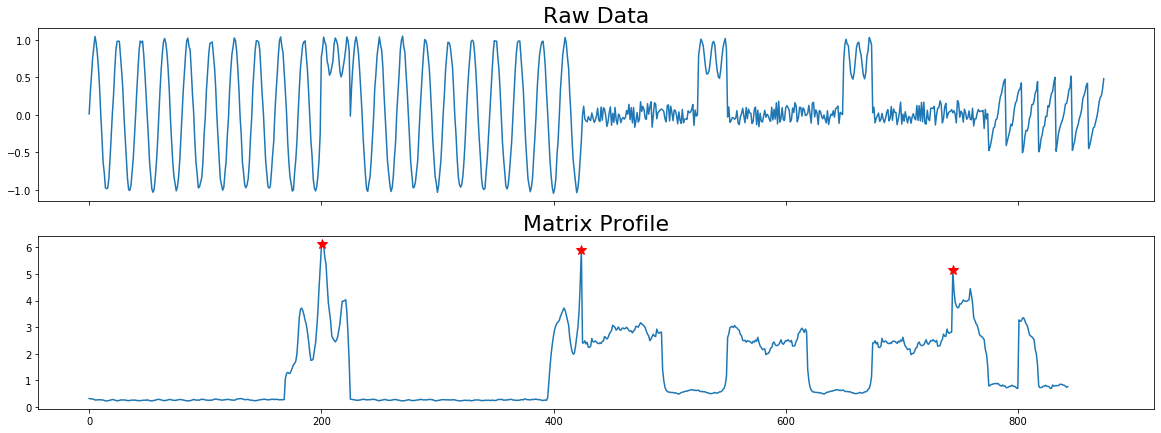

In [4]:
# We have to adjust the matrix profile to match the dimensions of the original
# time series
mp_adjusted = np.append(profile['mp'], np.zeros(profile['w'] - 1) + np.nan)

# Create a plot with three subplots
fig, axes = plt.subplots(2, 1, sharex=True, figsize=(20,7))
axes[0].plot(np.arange(len(profile['data']['ts'])), profile['data']['ts'])
axes[0].set_title('Raw Data', size=22)

#Plot the Matrix Profile
axes[1].plot(np.arange(len(mp_adjusted)), mp_adjusted)
axes[1].set_title('Matrix Profile', size=22)

for discord in profile['discords']:
    x = discord
    y = profile['mp'][discord]
    
    axes[1].plot(x, y, marker='*', markersize=10, c='r')

plt.show()

## Plot with Color

This example shows how you can plot on top of the original time series.

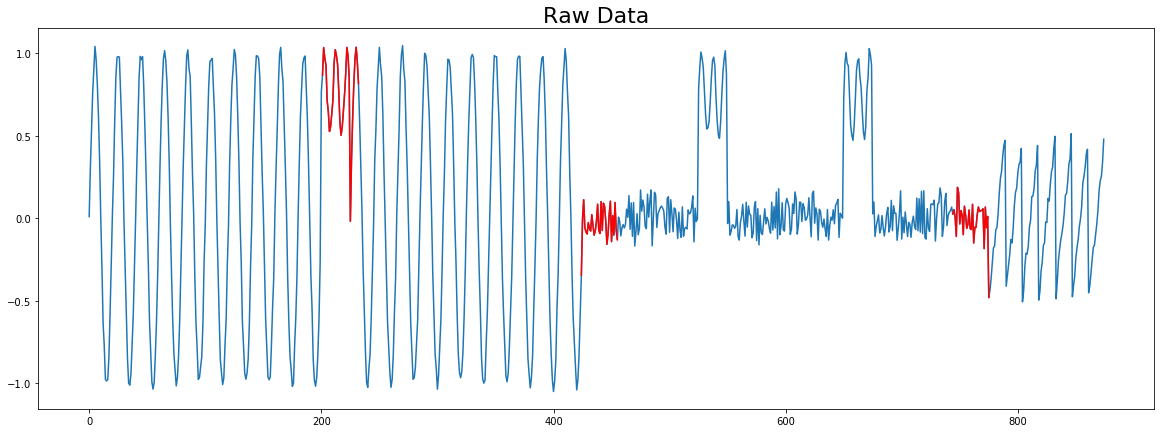

In [5]:
# We have to adjust the matrix profile to match the dimensions of the original
# time series
mp_adjusted = np.append(profile['mp'], np.zeros(profile['w'] - 1) + np.nan)

# Create a plot with three subplots
fig, ax = plt.subplots(1, 1, sharex=True, figsize=(20,7))
ax.plot(np.arange(len(profile['data']['ts'])), profile['data']['ts'])
ax.set_title('Raw Data', size=22)

for discord in profile['discords']:
    x = np.arange(discord, discord + profile['w'])
    y = profile['data']['ts'][discord:discord + profile['w']]
    
    ax.plot(x, y, c='r')

plt.show()

## Plot with Heatmap

Display a colored heatmap over the original time series.

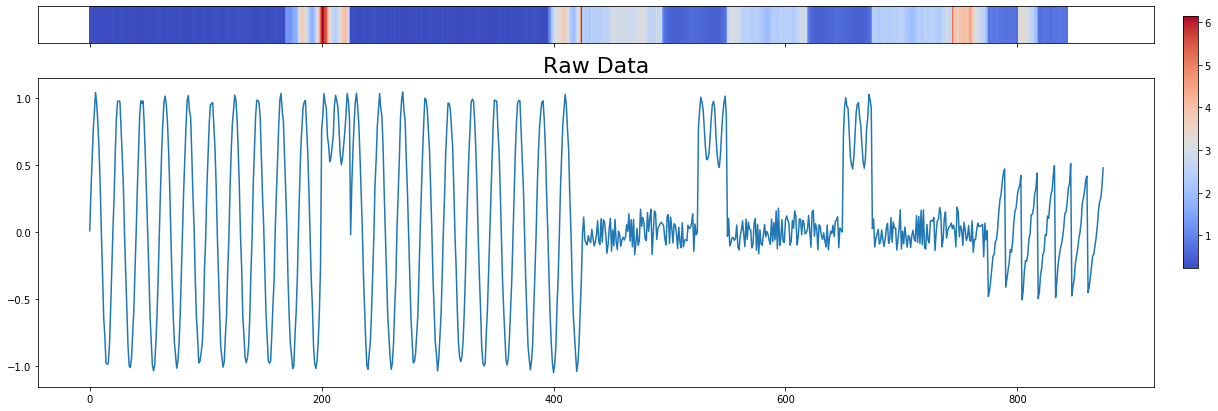

In [6]:
# We have to adjust the matrix profile to match the dimensions of the original
# time series
mp_adjusted = np.append(profile['mp'], np.zeros(profile['w'] - 1) + np.nan)

fig, axes = plt.subplots(2, 1, sharex=True, figsize=(20, 7), gridspec_kw={'height_ratios': [3, 25]})
pos = axes[0].imshow([mp_adjusted,], aspect='auto', cmap='coolwarm')
axes[0].set_yticks([])

axes[1].plot(np.arange(len(profile['data']['ts'])), profile['data']['ts'])
axes[1].set_title('Raw Data', size=22)

cbar_ax = fig.add_axes([0.92, 0.36, 0.01, 0.5])
fig.colorbar(pos, orientation='vertical', cax=cbar_ax, use_gridspec=True)
plt.show()